## Week 12: Lecture 1

We have used hypothesis testing either to compare a sample and a population or to compare two samples. Again we want to compare a sample and a population. However we will not have access to different samples from the population or a null hypothesis allowing us to simulate different samples from a population. 

Still we can make guesses about the population. We will resample from the sample through the bootstrap method. Here we select records at random from the sample with replacement. Each time we repeat the process we have another dataset. While these datasets cannot substitute for differnt samples from the population, they allow us to use limited data to make justifiable and reproducible guesses.   

Before returning to the data on health care, we will look at data about transportation. We have records of flight delays for United Airlines throughout the summer of 2015.

In [1]:
# some data science packages

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)

# some helpful functions we wrote for you

from helper_functions import *

### Exercise (Percentiles)

**(a)** We want to generate a box-plot of the flight delays.

In [2]:
flights = pd.read_csv('flight_delays.csv')
flights

,Date,Flight Number,Destination,Delay,Month
0,6/1/15,73,HNL,257,June
1,6/1/15,217,EWR,28,June
2,6/1/15,237,STL,-3,June
3,6/1/15,250,SAN,0,June
4,6/1/15,267,PHL,64,June
...,...,...,...,...,...
13820,8/31/15,1978,LAS,-4,August
13821,8/31/15,1993,IAD,8,August
13822,8/31/15,1994,ORD,3,August
13823,8/31/15,2000,PHX,-1,August


Note that we have 13825 rows and 5 columns 

- date of the flight
- flight number 
- destination of the flight 
- delay in minutes 
- month of the flight

Here the delay can be negative to indicate that the flight left the airport earlier than the scheduled departure time.

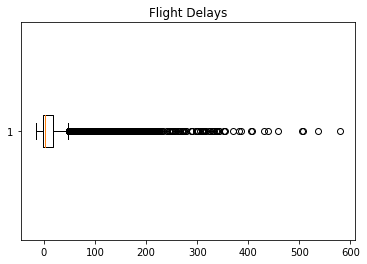

In [3]:
plt.boxplot(flights["Delay"], vert = False)
plt.title("Flight Delays");

Note that box-plots can show the data from left to right or up and down. By setting `vert` to False, we have the data from left to right. 

However the outliers obscure the rest of the data. 

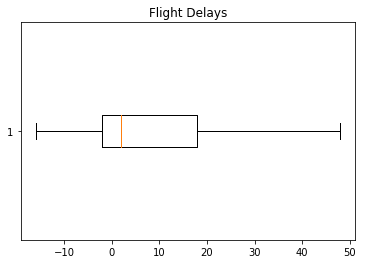

In [5]:
plt.boxplot(flights["Delay"], vert = False, showfliers=False)
plt.title("Flight Delays");

We can set the argument `showfliers` to be False. We hide the outliers to allow for a more understandable chart. Since the outliers are to the right, we call the dataset right-skewed.

In [6]:
june_delays = flights[flights["Month"] == "June"]["Delay"]
july_delays = flights[flights["Month"] == "July"]["Delay"]
august_delays = flights[flights["Month"] == "August"]["Delay"]

After splitting up the table into months, we can generate a chart with three side-by-side boxplots for June, July and August.

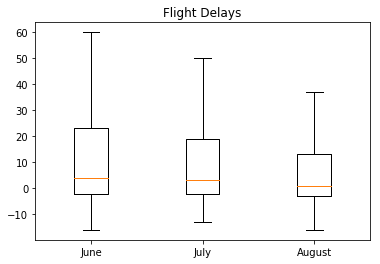

In [7]:
plt.boxplot([june_delays, july_delays, august_delays], vert = True, showfliers=False)
plt.xticks([1,2,3], ["June", "July", "August"])
plt.title("Flight Delays");

**True or False** 

1. The maximum flight delay in June was 60 minutes
1. The average flight delay in August was 0. 
1. One quarter of flights left early in June, July and August 

**(b)** Remember the helper function `calculate_percentile`

In [8]:
calculate_percentile(june_delays, 50) # helper function 

4

Here we compute the 4th percentile for June. Use `calculate_percentile` to compute the 

- 25th percentile
- 50th percentile
- 75th percentile 
- Inter-Quartile Range

for the all flights throughout the summer. 

In [9]:
median = ...
lower_quartile = ...
upper_quartile = ...
iqr = ...

Remembering the rules for box-plots, compute the location of the whiskers.

In [10]:
upper_cutoff = ...
lower_cutoff = ...

Now we can add some text to the chart.

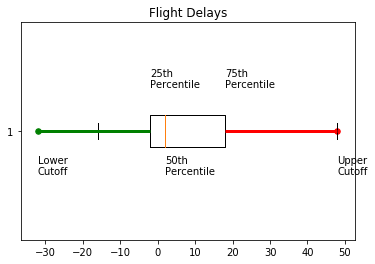

In [11]:
generate_boxplot(flights, lower_cutoff, upper_cutoff, lower_quartile, median, upper_quartile) # helper function 

**(c)**  **Fill-in-the-Blank** What are the cut-offs for outliers in the box-plots? 

- If the delay was less than ___ then the flight was an outlier over the summer 
- If the delay was greater than ___ then the flight was an outlier over the summer

### Example (Bootstrap)

Suppose we were studying delays on United Airline flights in the summer of 2015. We have all of the data about the population in `flights`. However, we usually lack some data about a population. We could try to collect more data on the population. While we want to avoid missing records, we might have trouble analyzing too much data.  

So we tend to work with samples from populations. The samples allow us to make guesses about the population. However, we cannot just make an estimate. We need to remember that we could have obtained a different sample. So we could have made a different guess. 

In [14]:
population_median = calculate_percentile(flights["Delay"], 50)
population_median

2

Suppose we want to estimate the median flight delay on United Airline flights in the summer of 2015. We know that the population median is 2 minutes. If we gather a sample at random from the population, then we can make an estimate.

In [18]:
sample_size = 1382
sample = sample_without_replacement(sample_size, flights["Delay"]) # helper function 
calculate_percentile(sample, 50)

2

Here we sampled 10% of the population. What about sampling 1% of the population?

In [27]:
sample_size = 138
sample = sample_without_replacement(sample_size, flights["Delay"])
calculate_percentile(sample, 50)

2

With smaller sample size the estimates vary between samples. 

- How much do these estimates vary between samples? 
- What approaches could we take to study the differences in guesses between samples

We could go out to the population and collect different samples. However, we might not have the resources to conduct another observational or experimental study. We could try to make some assumptions about the population that allow us to simulate samples. However, we might not be able to determine reasonable assumptions for the problem. Instead we will sample from the sample. We call it the bootstrap method.

##### First Try : Sampling from the Population

If we have the resources to gather different samples from the population, then we can compare different samples.

In [28]:
replications = 1
sample_size = 1382

estimates = []
for replication in range(replications):
    sample = sample_without_replacement(sample_size, flights["Delay"])
    guess = calculate_percentile(sample, 50)
    estimates.append(guess)

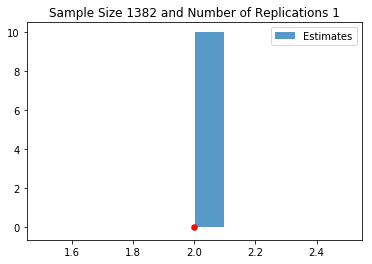

In [29]:
plt.hist(estimates, density = True, rwidth=0.95, alpha = 0.75, label = "Estimates")
plt.scatter(population_median, 0, s = 30, c = "r", zorder = 5)
plt.legend()
plt.title('Sample Size {} and Number of Replications {}'.format(sample_size, replications));

We can repeat with multiple replications

In [30]:
replications = 1000
sample_size = 1382

estimates = []
for replication in range(replications):
    sample = sample_without_replacement(sample_size, flights["Delay"])
    guess = calculate_percentile(sample, 50)
    estimates.append(guess)

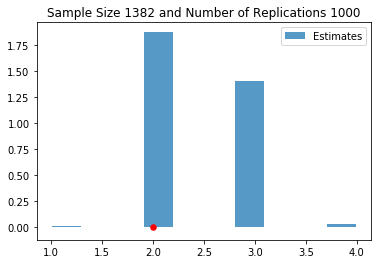

In [31]:
plt.hist(estimates, density = True, rwidth=0.95, alpha = 0.75, label = "Estimates")
plt.scatter(population_median, 0, s = 30, c = "r", zorder = 5)

plt.legend()
plt.title('Sample Size {} and Number of Replications {}'.format(sample_size, replications));

We can change the sample size.

In [34]:
replications = 1000
sample_size = 138

estimates = []
for replication in range(replications):
    sample = sample_without_replacement(sample_size, flights["Delay"])
    guess = calculate_percentile(sample, 50)
    estimates.append(guess)

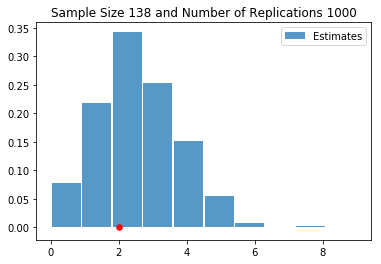

In [35]:
plt.hist(estimates, density = True, rwidth=0.95, alpha = 0.75, label = "Estimates")
plt.scatter(population_median, 0, s = 30, c = "r", zorder = 5)

plt.legend()
plt.title('Sample Size {} and Number of Replications {}'.format(sample_size, replications));

Note that most sample medians lie close to the population median

In [36]:
percentile_5 = calculate_percentile(estimates, 5)
percentile_95 = calculate_percentile(estimates, 95)

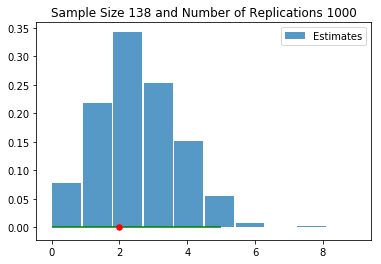

In [37]:
plt.hist(estimates, density = True, rwidth=0.95, alpha = 0.75, label = "Estimates")
plt.scatter(population_median, 0, s = 30, c = "r", zorder = 5)
plt.hlines(y = 0, xmin = percentile_5, xmax = percentile_95, color = "green")
plt.legend()
plt.title('Sample Size {} and Number of Replications {}'.format(sample_size, replications));

##### Second Try : Simulating Samples from the Population

Suppose we want to make some assumptions about the population to help with simulation. Remember the numbers we computed from the exercise. 

In [38]:
print("The shortest delay was {}".format(min(flights["Delay"])))
print("The 25th percentile was {}".format(lower_quartile))
print("The 50th percentile was {}".format(median))
print("The 75th percentile was {}".format(upper_quartile))

The shortest delay was -16
The 25th percentile was -2
The 50th percentile was 2
The 75th percentile was 18


So we can try to propose a model for the flight delays

- chance of delay -16 minutes is 0.25
- chance of delay -2 minutes is 0.25
- chance of delay 2 minutes is 0.25
- chance of delay 18 minutes is 0.25

Here we want to avoid the large outliers. We can run a simulation with these probabilities

In [77]:
chances = np.array([0.25, 0.25, 0.25, 0.25])
sample_size = 138

def proportion_delays():
    return sample_proportions(sample_size, chances) # helper function 

proportion_delays() * sample_size

array([26., 38., 37., 37.])

Note that we obtain a simulated sample from the population. We take these values to be the number of flights with delays -16,-2,2,18. Repeating over many replications 

In [90]:
replications = 1000
sample_size = 138
amount_delay = [-16, -2, 2, 18]

estimates = []
for replication in range(replications):
    simulated_delays = proportion_delays() * sample_size

    sample = calculate_delays(amount_delay, simulated_delays) # helper function 
    
    guess = calculate_percentile(sample, 50)
    estimates.append(guess)

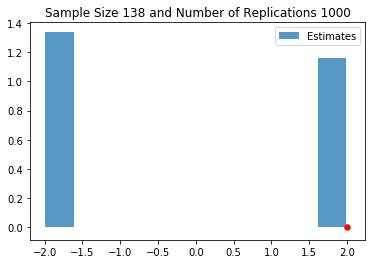

In [91]:
plt.hist(estimates, density = True, rwidth=0.95, alpha = 0.75, label = "Estimates")
plt.scatter(population_median, 0, s = 30, c = "r", zorder = 5)

plt.legend()
plt.title('Sample Size {} and Number of Replications {}'.format(sample_size, replications));

##### Third Try : Bootstrap Method of Resampling

While we might not be able to gather different samples from the population or simulate different samples from the population, we can substitute the sample for the population. If we treat the sample like the population, we can sample from it.

In [97]:
sample_size = 1382
sample = sample_without_replacement(sample_size, flights["Delay"])
sample_median = calculate_percentile(sample, 50)
sample_median

3

We want to generate another sample with the same size. So we need to sample with replacement. Otherwise, we would obtain the same sample. 

In [103]:
resample_size = len(sample)
resample = sample_with_replacement(resample_size, sample) # helper function 

resample_median = calculate_percentile(resample, 50)
resample_median

4

The numbers in the resample come from the number in the sample. So we cannot obtain any numbers from the population absent from the sample. 

However, the sample and the resample are different. We have numbers in the sample that are absent from the resample. We have numbers in the sample that appear multiple times in the resample. 

By selecting at random with replacement, we create the possibility for the resample to be different from the sample. Let us generate many resamples.

In [104]:
replications = 1000
resample_size = len(sample)

estimates = []
for replication in range(replications):
    resample = sample_with_replacement(resample_size, sample)
    
    guess = calculate_percentile(resample, 50)
    estimates.append(guess)

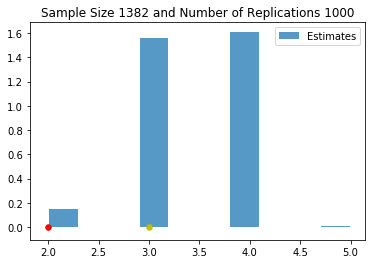

In [105]:
plt.hist(estimates, density = True, rwidth=0.95, alpha = 0.75, label = "Estimates")
plt.scatter(population_median, 0, s = 30, c = "r", zorder = 5)
plt.scatter(sample_median, 0, s = 30, c = "y", zorder = 5)

plt.legend()
plt.title('Sample Size {} and Number of Replications {}'.format(resample_size, replications));

##### Next Steps

How does the bootstrap method help us? We can try to repeat the bootstrap method for different samples from the population. 

- We will generate 100 samples from the population. 
- For each sample we will generate 1000 resamples. 
- We can calculate the median of each resample
- We know that 90% of the estimates lie between the 5th percentile and 95th percentile. So we check whether the sample median lies in the confidence interval determined by the resamples.
- So for each of the 100 samples, we calculate 
  * True -- the sample median lies in the confidence interval
  * False -- the sample median does not lie in the confidence interval

What is the ratio of True to False?

In [107]:
number_of_samples_from_population = 100

true_or_false, left_right = repeat_bootstrap(flights, population_median, number_of_samples_from_population) # helper function

sum(true_or_false) / number_of_samples_from_population

0.91

We can plot the confidence intervals.

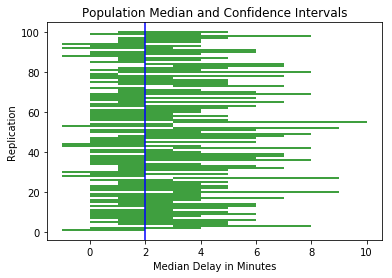

In [108]:
for idx, entry in enumerate(left_right):
    plt.hlines(y = idx + 1, xmin = entry[0], xmax = entry[1], color = "green")

plt.axvline(x = population_median, color = "blue")
plt.xlabel('Median Delay in Minutes')
plt.ylabel('Replication')
plt.title('Population Median and Confidence Intervals');